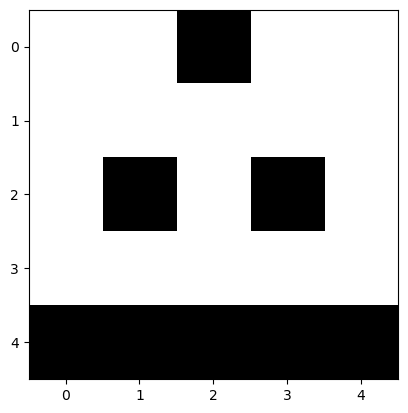

In [160]:
import numpy as np
import matplotlib.pyplot as plt


def generate_random_sprite():
  sprite = np.random.randint(0, 2, size=(5, 5))
  sprite = sprite | np.fliplr(sprite)

  return sprite

sprite = generate_random_sprite()

plt.imshow(sprite, cmap='gray')
plt.show()


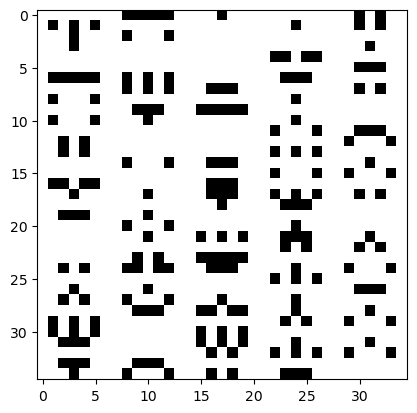

In [179]:
import numpy as np
import matplotlib.pyplot as plt

def pad_with(vector, pad_width, iaxis, kwargs):
    pad_value = kwargs.get('padder', 1)
    vector[:pad_width[0]] = pad_value
    vector[-pad_width[1]:] = pad_value

def generate_random_sprite():
  sprite = np.random.randint(0, 2, size=(5, 5))
  sprite = sprite | np.fliplr(sprite)
  sprite = np.pad(sprite, 1, pad_with, padder=1)
  return sprite

def generate_sprite_sheet(n_sprites):
  sprites = np.zeros((n_sprites, 7, 7), dtype=np.uint8)
  for i in range(n_sprites):
    sprites[i] = generate_random_sprite()
  return sprites

def display_sprite_sheet(spritesheet, cmap='gray'):
  combined_image = spritesheet.reshape(35, 35)
  plt.imshow(combined_image, cmap=cmap)
  plt.show()


n_sprites = 25
spritesheet = generate_sprite_sheet(n_sprites)
display_sprite_sheet(spritesheet)


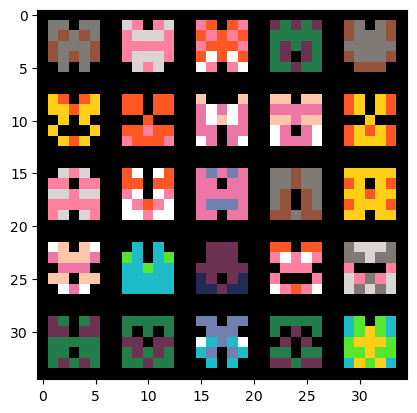

In [301]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np




hex_colors=["000000","1D2B53","7E2553",
"008751","AB5236","5F574F","C2C3C7","FFF1E8","FF004D","FFA300","FFEC27","00E436","29ADFF","83769C","FF77A8","FFCCAA","FFFFFF"]
hex_colors=[x.lower() for x in hex_colors ]
palette=[]
for i in range(len(hex_colors)):
  rgbp=(int(hex_colors[i][0:2],16),int(hex_colors[i][2:4],16),int(hex_colors[i][4:6],16))
  palette.append(rgbp)
  
  
hex_colors = [mcolors.rgb2hex(np.array(color) / 255) for color in palette]
cmap = mcolors.LinearSegmentedColormap.from_list("custom_cmap", hex_colors)

def pad_with(vector, pad_width, iaxis, kwargs):
    pad_value = kwargs.get('padder', 1)
    vector[:pad_width[0]] = pad_value
    vector[-pad_width[1]:] = pad_value

def generate_sprite():
    ahahahah=[range(16)]
    hihihi=np.random.randint(1,14)
    sprite = np.random.choice([0,hihihi,hihihi+1], size=(5,5))
    sprite = sprite | np.fliplr(sprite)
    sprite = np.pad(sprite, pad_width=1, mode='constant', constant_values=0)
    #print(sprite)
    return sprite

def generate_sprite_sheet(n_sprites):
  sprites = np.zeros((n_sprites, 7, 7))
  for i in range(n_sprites):
    sprites[i] = generate_sprite()
  #print(sprites)
  return sprites

def display_sprite_sheet(spritesheet, cmap=cmap):
  combined_image = np.concatenate([np.concatenate(spritesheet[i:i + 5], axis=1) for i in range(0, 25, 5)], axis=0)
  plt.imshow(combined_image, cmap=cmap)
  plt.show()


n_sprites = 25
spritesheet = generate_sprite_sheet(n_sprites)
display_sprite_sheet(spritesheet)

(70, 70, 3)


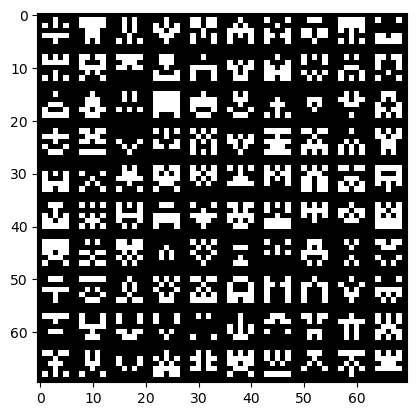

In [156]:
import matplotlib.pyplot as plt
import numpy as np

WIDTH = 5
HEIGHT = 5
ROWS = 10
COLS = 10
PADDING = 2

sprite_width = WIDTH + PADDING
sprite_height = HEIGHT + PADDING
x = np.zeros((sprite_height * ROWS, sprite_width * COLS, 3))
print(x.shape)

for sprite in range(ROWS * COLS):
    X = sprite // ROWS
    Y = sprite % ROWS
    mid = sprite_width // 2 + sprite_width % 2
    for col in range(1, mid):
        for row in range(1, sprite_height - 1):
            x[Y * sprite_height + row, X * sprite_width + col] += np.array([np.random.randint(2)] * 3)
        x[:, X * sprite_width + (sprite_width - col - 1)] = x[:, X * sprite_width + col]

plt.imshow(x)
plt.show()

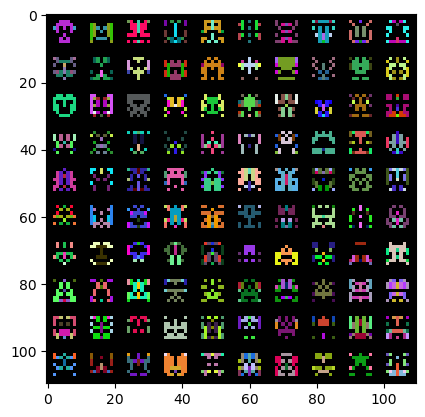

In [163]:
import matplotlib.pyplot as plt
import numpy as np


def R():
    return np.random.random()


WIDTH = 7
HEIGHT = 7
ROWS = 10
COLS = 10
PADDING = 4
ONE_SIDE_PADDING = PADDING // 2
COLOR_SWITCH_PROB = 33 / 256

sprite_width = WIDTH + PADDING
sprite_height = HEIGHT + PADDING
x = np.zeros((sprite_height * ROWS, sprite_width * COLS, 3))

for sprite in range(ROWS * COLS):
    X = sprite // ROWS
    Y = sprite % ROWS
    mid = sprite_width // 2 + sprite_width % 2
    for step in range(2):
        color = np.array([R(), R(), R()])
        for col in range(ONE_SIDE_PADDING, mid):
            for row in range(ONE_SIDE_PADDING, sprite_height - ONE_SIDE_PADDING):
                if step == 0:
                    x[Y * sprite_height + row, X * sprite_width + col] += [np.random.randint(2) * 255] * 3
                else:
                    x[Y * sprite_height + row, X * sprite_width + col] *= color / 255
                    if R() < COLOR_SWITCH_PROB:
                        color = np.array([R(), R(), R()])
            x[:, X * sprite_width + (sprite_width - col - 1)] = x[:, X * sprite_width + col]

plt.imshow(x)
plt.show()